In [1]:
import os
os.chdir('..')

from sparse_coding_torch.pnb.video_loader import PNBLoader
import numpy as np
import tensorflow as tf
from yolov4.get_bounding_boxes import YoloModel
from sparse_coding_torch.utils import VideoGrayScaler, MinMaxScaler
import torchvision
from sparse_coding_torch.utils import plot_video

2022-08-25 15:04:46.181898: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-25 15:04:46.183851: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-25 15:04:46.185760: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-25 15:04:46.187608: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-25 15:04:46.197704: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from S

In [2]:
yolo_model = YoloModel('pnb')
video_path = "/shared_data/bamc_pnb_data/revised_training_data/"
transform = torchvision.transforms.Compose(
    [VideoGrayScaler(),
     torchvision.transforms.Resize((250, 400))
    ])

2022-08-25 15:05:02.757072: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-25 15:05:02.757966: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-25 15:05:02.759668: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-25 15:05:02.761552: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-25 15:05:02.763405: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from S

301


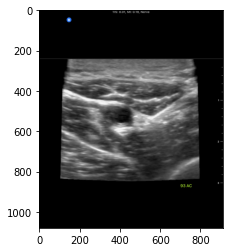

In [ ]:
from matplotlib.pyplot import imshow
from matplotlib import pyplot as plt
from matplotlib import cm
import matplotlib.patches as patches

labels = [name for name in os.listdir(video_path) if os.path.isdir(os.path.join(video_path, name))]

videos = [('Positives', os.path.abspath(os.path.join(video_path, 'Positives', '93', '3. 93 AC_Video 2.mp4')))]

label, path = videos[0]
vc = torchvision.io.read_video(path)[0].permute(3, 0, 1, 2)
print(vc.size(1))

frame = vc[:, 300, :, :].swapaxes(0, 2).swapaxes(0, 1).numpy()

imshow(frame)

(1080, 912, 3)
[0.35116956 0.56193376 0.5238077  0.86585724]


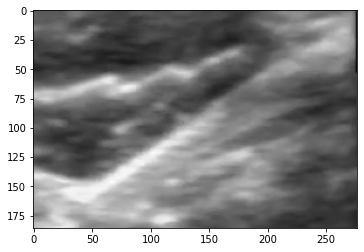

In [ ]:
orig_height = vc.size(2)
orig_width = vc.size(3)
print(frame.shape)
bounding_boxes, classes, scores = yolo_model.get_bounding_boxes(frame)
bounding_boxes = bounding_boxes.squeeze(0)
classes = classes.squeeze(0)
scores = scores.squeeze(0)

needle_bb = [bb for bb, class_pred, score in zip(bounding_boxes, classes, scores) if class_pred==2][0]

x_min = int(needle_bb[1] * orig_width)
x_max = int(needle_bb[3] * orig_width)
y_min = int(needle_bb[0] * orig_height)
y_max = int(needle_bb[2] * orig_height)

print(needle_bb)
imshow(frame[y_min:y_max, x_min:x_max, :])

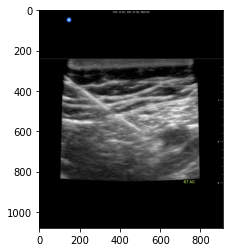

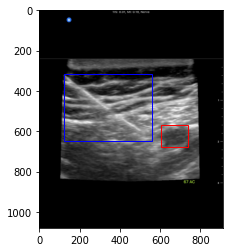

In [33]:
from sparse_coding_torch.pnb.video_loader import classify_nerve_is_right
from matplotlib.pyplot import imshow
from matplotlib import pyplot as plt
from matplotlib import cm
import matplotlib.patches as patches

labels = [name for name in os.listdir(video_path) if os.path.isdir(os.path.join(video_path, name))]

# videos = [('Positives', os.path.abspath(os.path.join(video_path, 'Positives', '93', '3. 93 AC_Video 2.mp4')))]
videos = [('Positive', 'pnb_same_frame_362.mp4')]

label, path = videos[0]
vc = torchvision.io.read_video(path)[0].permute(3, 0, 1, 2)
is_right = classify_nerve_is_right(yolo_model, vc)

frame = vc[:, -5, :, :].swapaxes(0, 2).swapaxes(0, 1).numpy()

imshow(frame)

orig_height = vc.size(2)
orig_width = vc.size(3)
bounding_boxes, classes, scores = yolo_model.get_bounding_boxes_v5(frame)

nerve_bb = [bb for bb, class_pred, score in zip(bounding_boxes, classes, scores) if class_pred==0][0]
needle_bb = [bb for bb, class_pred, score in zip(bounding_boxes, classes, scores) if class_pred==2][0]

nerve_center_x = round((nerve_bb[2] + nerve_bb[0]) / 2 * orig_width)
nerve_center_y = round((nerve_bb[3] + nerve_bb[1]) / 2 * orig_height)

needle_center_x = round((needle_bb[2] + needle_bb[0]) / 2 * orig_width)
needle_center_y = round((needle_bb[3] + needle_bb[1]) / 2 * orig_height)

# Create figure and axes
fig, ax = plt.subplots()

# Display the image
ax.imshow(frame, cmap=cm.Greys_r)

# Create a Rectangle patch
nerve_rect = patches.Rectangle((nerve_bb[0] * orig_width, nerve_bb[3] * orig_height), (nerve_bb[2] - nerve_bb[0]) * orig_width, (nerve_bb[3] - nerve_bb[1]) * -orig_height, linewidth=1, edgecolor='r', facecolor='none')
needle_rect = patches.Rectangle((needle_bb[0] * orig_width, needle_bb[3] * orig_height), (needle_bb[2] - needle_bb[0]) * orig_width, (needle_bb[3] - needle_bb[1]) * -orig_height, linewidth=1, edgecolor='b', facecolor='none')
# print(needle_bb)

# # Add the patch to the Axes
ax.add_patch(nerve_rect)
ax.add_patch(needle_rect)
# plt.scatter([needle_bb[0]*orig_width], [needle_bb[3]*orig_height], color=["red"])
plt.show()


100%|██████████| 1/1 [00:03<00:00,  3.32s/it]

112.38454817660158


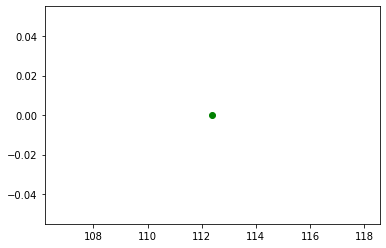

In [ ]:
from sparse_coding_torch.pnb.video_loader import classify_nerve_is_right
from matplotlib.pyplot import imshow
from matplotlib import pyplot as plt
from matplotlib import cm
import matplotlib.patches as patches
import math
from tqdm import tqdm
import glob
from os.path import join, abspath

labels = [name for name in os.listdir(video_path) if os.path.isdir(os.path.join(video_path, name))]

videos = []
for label in labels:
    videos.extend([(label, abspath(join(video_path, label, f)), f) for f in glob.glob(join(video_path, label, '*', '*.mp4'))])

all_distances = []
all_colors = []
for label, path, vid_f in tqdm(videos):
    vc = torchvision.io.read_video(path)[0].permute(3, 0, 1, 2)
    is_right = classify_nerve_is_right(yolo_model, vc)
    
    orig_height = vc.size(2)
    orig_width = vc.size(3)
    
    nerve_bb = []
    needle_bb = []
    
    for i in range(vc.size(1) - 1, vc.size(1) - 40, -1):
        frame = vc[:, i, :, :].swapaxes(0, 2).swapaxes(0, 1).numpy()

        bounding_boxes, classes, scores = yolo_model.get_bounding_boxes_v5(frame)

        nerve_bb = [bb for bb, class_pred, score in zip(bounding_boxes, classes, scores) if class_pred==1]
        needle_bb = [bb for bb, class_pred, score in zip(bounding_boxes, classes, scores) if class_pred==2]
        
        if len(nerve_bb) > 0 and len(needle_bb) > 0:
            nerve_bb = nerve_bb[0]
            needle_bb = needle_bb[0]
            break

    if len(nerve_bb) == 0 or len(needle_bb) == 0:
        continue

    nerve_x = round((nerve_bb[2] + nerve_bb[0]) / 2 * orig_width)
    nerve_y = round((nerve_bb[3] + nerve_bb[1]) / 2 * orig_height)
    
    needle_x = needle_bb[2] * orig_width
    needle_y = needle_bb[3] * orig_height

    if not is_right:
        needle_x = needle_bb[0] * orig_width
        
    distance = math.sqrt((nerve_x - needle_x)**2 + (nerve_y - needle_y)**2)
    
    all_distances.append(distance)
    if label == 'Positives':
        all_colors.append('green')
    elif label == 'Negatives':
        all_colors.append('red')
    else:
        raise Exception('Bad Label')

plt.scatter(all_distances, [0]*len(all_distances), color=all_colors)
plt.savefig('nerve_plot.png')

pnb_same_frame_124.mp4


  0%|          | 0/1 [00:00<?, ?it/s]

10
0.7170215845108032
0.5800381302833557


100%|██████████| 1/1 [00:01<00:00,  1.47s/it]

0.14535117212543647


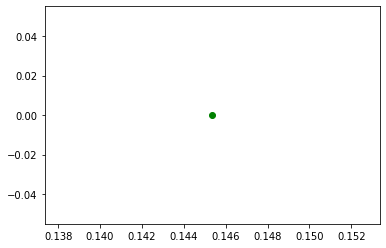

In [43]:
from sparse_coding_torch.pnb.video_loader import classify_nerve_is_right
from matplotlib.pyplot import imshow
from matplotlib import pyplot as plt
from matplotlib import cm
import matplotlib.patches as patches
import math
from tqdm import tqdm
import glob
from os.path import join, abspath
import torch
import random

labels = [name for name in os.listdir(video_path) if os.path.isdir(os.path.join(video_path, name))]

# videos = []
# for label in labels:
#     videos.extend([(label, abspath(join(video_path, label, f)), f) for f in glob.glob(join(video_path, label, '67', '*.mp4'))])

videos = [('Positives', 'pnb_same_frame_124.mp4', 'pnb_same_frame_124.mp4')]

all_distances = []
all_colors = []
for label, path, vid_f in videos:
    print(vid_f)
    vc = torchvision.io.read_video(path)[0].permute(3, 0, 1, 2)
    is_right = classify_nerve_is_right(yolo_model, vc)
    
    orig_height = vc.size(2)
    orig_width = vc.size(3)
    
    nerve_bb = []
    needle_bb = []
    
    for i in tqdm(random.sample(range(0, vc.size(1)), 1)):
        frame = vc[:, i, :, :].swapaxes(0, 2).swapaxes(0, 1).numpy()

        bounding_boxes, classes, scores = yolo_model.get_bounding_boxes_v5(frame)

        nerve_bb = [bb for bb, class_pred, score in zip(bounding_boxes, classes, scores) if class_pred==0]
        needle_bb = [bb for bb, class_pred, score in zip(bounding_boxes, classes, scores) if class_pred==2]
        
        if len(nerve_bb) > 0 and len(needle_bb) > 0:
            nerve_bb = nerve_bb[0]
            needle_bb = needle_bb[0]
        else:
            continue

#     if len(nerve_bb) == 0 or len(needle_bb) == 0:
#         continue

        nerve_x = (nerve_bb[2] + nerve_bb[0]) / 2
        nerve_y = (nerve_bb[3] + nerve_bb[1]) / 2

        needle_x = needle_bb[2]
        needle_y = needle_bb[3]

        if not is_right:
            needle_x = needle_bb[0]
            
        print(i)
        print(nerve_x)
        print(nerve_y)
        
        torchvision.io.write_video('pnb_same_frame_{}.mp4'.format(i), np.stack([frame] * 60, axis=0), fps=20)
        distance = math.sqrt((nerve_x - needle_x)**2 + (nerve_y - needle_y)**2)
        print(distance)
#         if i > 5:
#             raise Exception

        all_distances.append(distance)
        if label == 'Positives':
            all_colors.append('green')
        elif label == 'Negatives':
            all_colors.append('red')
        else:
            raise Exception('Bad Label')

plt.scatter(all_distances, [0]*len(all_distances), color=all_colors)
plt.savefig('nerve_plot.png')

In [ ]:
from sparse_coding_torch.pnb.video_loader import calculate_angle
import torchvision
import cv2

def get_yolo_regions_polar(yolo_model, clip, is_right, needle_bb, crop_width, crop_height):
    orig_height = clip.size(2)
    orig_width = clip.size(3)
    bounding_boxes, classes, scores = yolo_model.get_bounding_boxes(clip[:, 2, :, :].swapaxes(0, 2).swapaxes(0, 1).numpy())
    bounding_boxes = bounding_boxes.squeeze(0)
    classes = classes.squeeze(0)
    scores = scores.squeeze(0)
    
    needle_bb = None
    
    for bb, class_pred in zip(bounding_boxes, classes):
        if class_pred == 2:
            needle_bb = bb
            
    if needle_bb is None:
        return None
    
    all_clips = []
    for bb, class_pred, score in zip(bounding_boxes, classes, scores):
        if class_pred != 0:
            continue
        center_x = round((bb[3] + bb[1]) / 2 * orig_width)
        center_y = round((bb[2] + bb[0]) / 2 * orig_height)
        
        if not is_right:
            clip = torchvision.transforms.functional.hflip(clip)
            center_x = orig_width - center_x
            needle_bb[1] = orig_width - needle_bb[1]
            needle_bb[3] = orig_width - needle_bb[3]
        
#         lower_y = round((bb[0] * orig_height))
#         upper_y = round((bb[2] * orig_height))
#         lower_x = round((bb[1] * orig_width))
#         upper_x = round((bb[3] * orig_width))
        
#         if is_right:
        angle = calculate_angle(needle_bb, center_x, center_y, orig_height, orig_width)
#         else:
#             angle = calculate_angle(needle_bb, lower_x, center_y, orig_height, orig_width)
        
#         lower_y = center_y - (crop_height // 2)
#         upper_y = center_y + (crop_height // 2) 
        
#         if is_right:
#             lower_x = center_x - crop_width
#             upper_x = center_x
#         else:
#             lower_x = center_x
#             upper_x = center_x + crop_width
            
#         if lower_x < 0:
#             lower_x = 0
#         if upper_x < 0:
#             upper_x = 0
#         if lower_y < 0:
#             lower_y = 0
#         if upper_y < 0:
#             upper_y = 0
        clip = torchvision.transforms.functional.rotate(clip, angle=angle, center=[center_x, center_y])
            
#         plt.clf()
#         plt.imshow(clip.numpy()[:, 0, :, :].swapaxes(0,1).swapaxes(1,2), cmap=cm.Greys_r)
#         # plt.scatter([214], [214], color="red")
#         plt.scatter([center_x, int(needle_bb[1]*orig_width)], [center_y, int(needle_bb[0] * orig_height)], color=["red", 'red'])
# #         cv2.imwrite('test_normal.png', clip.numpy()[:, 0, :, :].swapaxes(0,1).swapaxes(1,2))
#         plt.savefig('test_normal.png')
            
#         if rotate_box:
# #             cv2.imwrite('test_1.png', clip.numpy()[:, 0, :, :].swapaxes(0,1).swapaxes(1,2))
#             if is_right:
#         clip = tv.transforms.functional.rotate(clip, angle=angle, center=[center_x, center_y])
#             else:
# #                 cv2.imwrite('test_1.png', clip.numpy()[:, 0, :, :].swapaxes(0,1).swapaxes(1,2))
#                 clip = tv.transforms.functional.rotate(clip, angle=-angle, center=[center_x, center_y])
#                 cv2.imwrite('test_2.png', clip.numpy()[:, 0, :, :].swapaxes(0,1).swapaxes(1,2))

#         plt.imshow(clip[0, 0, :, :], cmap=cm.Greys_r)
#         # plt.annotate('25, 50', xy=(25, 50), xycoords='data',
#         #             xytext=(0.5, 0.5), textcoords='figure fraction',
#         #             arrowprops=dict(arrowstyle="->"))
#         plt.scatter([center_x], [center_y], color="red")
#         plt.savefig('red_dot.png')
#         clip = clip[:, :, :upper_y, :]

        ro,col=clip[0, 0, :, :].shape
        max_radius = int(np.sqrt(ro**2+col**2)/2)
#         print(upper_y)
#         print(bb[0])
#         print(center_x)
#         print(center_y)
        trimmed_clip = []
        for i in range(clip.shape[0]):
            sub_clip = []
            for j in range(clip.shape[1]):
                sub_clip.append(cv2.linearPolar(clip[i, j, :, :].numpy(), (center_x, center_y), max_radius, cv2.WARP_FILL_OUTLIERS))
#                 sub_clip.append(warp_polar(clip[i, j, :, :].numpy(), center=(center_x, center_y), radius=max_radius, preserve_range=True))
            trimmed_clip.append(np.stack(sub_clip))
        trimmed_clip = np.stack(trimmed_clip)
        
        approximate_needle_position = int(((angle+150)/360)*orig_height)
        
        trimmed_clip = trimmed_clip[:, :, approximate_needle_position - (crop_height//2):approximate_needle_position + (crop_height//2), :]
                
#         trimmed_clip=cv2.linearPolar(clip[0, 0, :, :].numpy(), (center_x, center_y), max_radius, cv2.WARP_FILL_OUTLIERS)
#         trimmed_clip = warp_polar(clip[0, 0, :, :].numpy(), center=(center_x, center_y), radius=max_radius)

#         trimmed_clip = clip[:, :, lower_y:upper_y, lower_x:upper_x]
        
#         if orig_width - center_x >= center_x:
#         if not is_right:
#         print(angle)
#         if not is_right:
#         cv2.imwrite('test_polar.png', trimmed_clip[:, 0, :, :].swapaxes(0,1).swapaxes(1,2))
#         plt.clf()
#         plt.imshow(trimmed_clip[:, 0, :, :].swapaxes(0,1).swapaxes(1,2), cmap=cm.Greys_r)
#         # plt.scatter([214], [214], color="red")
# #         plt.scatter([center_x], [approximate_needle_position], color=["red"])
# #         cv2.imwrite('test_normal.png', clip.numpy()[:, 0, :, :].swapaxes(0,1).swapaxes(1,2))
#         plt.savefig('test_polar_trim.png')
#         raise Exception

#         if not is_right:
#             trimmed_clip = tv.transforms.functional.hflip(trimmed_clip)
#             cv2.imwrite('test_polar.png', trimmed_clip)
#             cv2.imwrite('test_yolo.png', trimmed_clip.numpy()[:, 0, :, :].swapaxes(0,1).swapaxes(1,2))
#             raise Exception
        
        if trimmed_clip.shape[2] == 0 or trimmed_clip.shape[3] == 0:
            continue
        all_clips.append(torch.tensor(trimmed_clip))

    return all_clips

In [ ]:
def get_yolo_regions(yolo_model, clip, is_right, needle_bb, crop_width, crop_height):
    orig_height = clip.size(2)
    orig_width = clip.size(3)
    bounding_boxes, classes, scores = yolo_model.get_bounding_boxes(clip[:, 2, :, :].swapaxes(0, 2).swapaxes(0, 1).numpy())
    bounding_boxes = bounding_boxes.squeeze(0)
    classes = classes.squeeze(0)
    scores = scores.squeeze(0)
    
    for bb, class_pred in zip(bounding_boxes, classes):
        if class_pred == 2:
            needle_bb = bb
    
    rotate_box = False
    
    all_clips = []
    for bb, class_pred, score in zip(bounding_boxes, classes, scores):
        if class_pred != 0:
            continue
        center_x = round((bb[3] + bb[1]) / 2 * orig_width)
        center_y = round((bb[2] + bb[0]) / 2 * orig_height)
        
        if not is_right:
            clip = torchvision.transforms.functional.hflip(clip)
            center_x = orig_width - center_x
#             needle_bb[1] = orig_width - needle_bb[1]
#             needle_bb[3] = orig_width - needle_bb[3]
        
#         lower_y = round((bb[0] * orig_height))
#         upper_y = round((bb[2] * orig_height))
#         lower_x = round((bb[1] * orig_width))
#         upper_x = round((bb[3] * orig_width))
        
#         if is_right:
#         angle = calculate_angle(needle_bb, center_x, center_y, orig_height, orig_width)
#         else:
#             angle = calculate_angle(needle_bb, lower_x, center_y, orig_height, orig_width)
        
#         lower_y = center_y - (crop_height // 2)
#         upper_y = center_y + (crop_height // 2) 
        
#         if is_right:
#             lower_x = center_x - crop_width
#             upper_x = center_x
#         else:
#             lower_x = center_x
#             upper_x = center_x + crop_width
            
#         if lower_x < 0:
#             lower_x = 0
#         if upper_x < 0:
#             upper_x = 0
#         if lower_y < 0:
#             lower_y = 0
#         if upper_y < 0:
#             upper_y = 0
#         clip = torchvision.transforms.functional.rotate(clip, angle=angle, center=[center_x, center_y])
            
#         plt.clf()
#         plt.imshow(clip.numpy()[:, 0, :, :].swapaxes(0,1).swapaxes(1,2), cmap=cm.Greys_r)
#         # plt.scatter([214], [214], color="red")
#         plt.scatter([center_x, int(needle_bb[1]*orig_width)], [center_y, int(needle_bb[0] * orig_height)], color=["red", 'red'])
# #         cv2.imwrite('test_normal.png', clip.numpy()[:, 0, :, :].swapaxes(0,1).swapaxes(1,2))
#         plt.savefig('test_normal.png')
            
#         if rotate_box:
# #             cv2.imwrite('test_1.png', clip.numpy()[:, 0, :, :].swapaxes(0,1).swapaxes(1,2))
#             if is_right:
#         clip = tv.transforms.functional.rotate(clip, angle=angle, center=[center_x, center_y])
#             else:
# #                 cv2.imwrite('test_1.png', clip.numpy()[:, 0, :, :].swapaxes(0,1).swapaxes(1,2))
#                 clip = tv.transforms.functional.rotate(clip, angle=-angle, center=[center_x, center_y])
#                 cv2.imwrite('test_2.png', clip.numpy()[:, 0, :, :].swapaxes(0,1).swapaxes(1,2))

#         plt.imshow(clip[0, 0, :, :], cmap=cm.Greys_r)
#         # plt.annotate('25, 50', xy=(25, 50), xycoords='data',
#         #             xytext=(0.5, 0.5), textcoords='figure fraction',
#         #             arrowprops=dict(arrowstyle="->"))
#         plt.scatter([center_x], [center_y], color="red")
#         plt.savefig('red_dot.png')
#         clip = clip[:, :, :upper_y, :]
        
        trimmed_clip = clip[:, :, center_y - (crop_height//2):center_y + (crop_height//2), center_x - (crop_width//2):center_x + (crop_width//2)]
                
#         trimmed_clip=cv2.linearPolar(clip[0, 0, :, :].numpy(), (center_x, center_y), max_radius, cv2.WARP_FILL_OUTLIERS)
#         trimmed_clip = warp_polar(clip[0, 0, :, :].numpy(), center=(center_x, center_y), radius=max_radius)

#         trimmed_clip = clip[:, :, lower_y:upper_y, lower_x:upper_x]
        
#         if orig_width - center_x >= center_x:
#         if not is_right:
#         print(angle)
#         if not is_right:
#         cv2.imwrite('test_polar.png', trimmed_clip[:, 0, :, :].swapaxes(0,1).swapaxes(1,2))
#         plt.clf()
#         plt.imshow(trimmed_clip[:, 0, :, :].swapaxes(0,1).swapaxes(1,2), cmap=cm.Greys_r)
#         # plt.scatter([214], [214], color="red")
# #         plt.scatter([center_x], [approximate_needle_position], color=["red"])
# #         cv2.imwrite('test_normal.png', clip.numpy()[:, 0, :, :].swapaxes(0,1).swapaxes(1,2))
#         plt.savefig('test_polar_trim.png')
#         raise Exception

#         if not is_right:
#             trimmed_clip = tv.transforms.functional.hflip(trimmed_clip)
#             cv2.imwrite('test_polar.png', trimmed_clip)
#             cv2.imwrite('test_yolo.png', trimmed_clip.numpy()[:, 0, :, :].swapaxes(0,1).swapaxes(1,2))
#             raise Exception
        
        if trimmed_clip.shape[2] == 0 or trimmed_clip.shape[3] == 0:
            continue
        all_clips.append(trimmed_clip)

    return all_clips

In [ ]:
import random
import glob
from sparse_coding_torch.pnb.video_loader import classify_nerve_is_right, get_needle_bb, load_pnb_region_labels
import torch

clip_depth = 5
clip_height = 250
clip_width = 400
frames_to_skip = 10

labels = [name for name in os.listdir(video_path) if os.path.isdir(os.path.join(video_path, name))]

region_labels = load_pnb_region_labels('sme_region_labels.csv')

videos = [('Positives', os.path.abspath(os.path.join(video_path, 'Positives', '153', '5. 153 AC_Video 3.mp4')))]

clips = []

label, path = videos[0]
vc = torchvision.io.read_video(path)[0].permute(3, 0, 1, 2)
is_right = classify_nerve_is_right(yolo_model, vc)
needle_bb = get_needle_bb(yolo_model, vc)

if label == 'Positives':
    label = np.array(1.0)
elif label == 'Negatives':
    label = np.array(0.0)

person_idx = path.split('/')[-1].split(' ')[1]

if label == 1.0 and person_idx in region_labels:
    negative_regions, positive_regions = region_labels[person_idx]
    for sub_region in negative_regions.split(','):
        sub_region = sub_region.split('-')
        start_loc = int(sub_region[0])
#                             end_loc = int(sub_region[1]) - 50
        end_loc = int(sub_region[1]) + 1
        for j in range(start_loc, end_loc - clip_depth * frames_to_skip, clip_depth):
            frames = []
            for k in range(j, j + clip_depth * frames_to_skip, frames_to_skip):
                frames.append(vc[:, k, :, :])
            vc_sub = torch.stack(frames, dim=1)

            if vc_sub.size(1) < clip_depth:
                continue

            for clip, polar_clip in zip(get_yolo_regions(yolo_model, vc_sub, is_right, needle_bb, clip_width, clip_height), get_yolo_regions_polar(yolo_model, vc_sub, is_right, needle_bb, clip_width, clip_height)):
                clip = transform(clip)
                polar_clip = transform(polar_clip)

                clips.append((np.array(0.0), clip.numpy(), polar_clip.numpy(), vc_sub.numpy()))

    if positive_regions:
        for sub_region in positive_regions.split(','):
            sub_region = sub_region.split('-')
#                                 start_loc = int(sub_region[0]) + 15
            start_loc = int(sub_region[0])
            if len(sub_region) == 1 and vc.size(1) >= start_loc + clip_depth * frames_to_skip:
                frames = []
                for k in range(start_loc, start_loc + clip_depth * frames_to_skip, frames_to_skip):
                    frames.append(vc[:, k, :, :])
                vc_sub = torch.stack(frames, dim=1)

                if vc_sub.size(1) < clip_depth:
                    continue

                for clip, polar_clip in zip(get_yolo_regions(yolo_model, vc_sub, is_right, needle_bb, clip_width, clip_height), get_yolo_regions_polar(yolo_model, vc_sub, is_right, needle_bb, clip_width, clip_height)):
                    clip = transform(clip)
                    polar_clip = transform(polar_clip)

                    clips.append((np.array(1.0), clip.numpy(), polar_clip.numpy(), vc_sub.numpy()))
            elif vc.size(1) >= start_loc + clip_depth * frames_to_skip:
                end_loc = sub_region[1]
                if end_loc.strip().lower() == 'end':
                    end_loc = vc.size(1)
                else:
                    end_loc = int(end_loc)
                for j in range(start_loc, end_loc - clip_depth * frames_to_skip, clip_depth):
                    frames = []
                    for k in range(j, j + clip_depth * frames_to_skip, frames_to_skip):
                        frames.append(vc[:, k, :, :])
                    vc_sub = torch.stack(frames, dim=1)

                    if vc_sub.size(1) < clip_depth:
                        continue
                    for clip, polar_clip in zip(get_yolo_regions(yolo_model, vc_sub, is_right, needle_bb, clip_width, clip_height), get_yolo_regions_polar(yolo_model, vc_sub, is_right, needle_bb, clip_width, clip_height)):
                        clip = transform(clip)
                        polar_clip = transform(polar_clip)

                        clips.append((np.array(1.0), clip.numpy(), polar_clip.numpy(), vc_sub.numpy()))
            else:
                continue
elif label == 1.0:
    frames = []
    for k in range(0, -1 * clip_depth * frames_to_skip, frames_to_skip):
        frames.append(vc[:, k, :, :])
    vc_sub = torch.stack(frames, dim=1)
    for clip, polar_clip in zip(get_yolo_regions(yolo_model, vc_sub, is_right, needle_bb, clip_width, clip_height), get_yolo_regions_polar(yolo_model, vc_sub, is_right, needle_bb, clip_width, clip_height)):
        clip = transform(clip)
        polar_clip = transform(polar_clip)

        clips.append((label, clip.numpy(), polar_clip.numpy(), vc_sub.numpy()))
elif label == 0.0:
    for j in range(0, vc.size(1) - clip_depth * frames_to_skip, clip_depth):
        frames = []
        for k in range(j, j + clip_depth * frames_to_skip, frames_to_skip):
            frames.append(vc[:, k, :, :])
        vc_sub = torch.stack(frames, dim=1)
        for clip, polar_clip in zip(get_yolo_regions(yolo_model, vc_sub, is_right, needle_bb, clip_width, clip_height), get_yolo_regions_polar(yolo_model, vc_sub, is_right, needle_bb, clip_width, clip_height)):
            clip = transform(clip)
            polar_clip = transform(polar_clip)

            clips.append((label, clip.numpy(), polar_clip.numpy(), vc_sub.numpy()))
else:
    raise Exception('Invalid label')

In [ ]:
from IPython.display import HTML
import random

random_idx = random.sample(range(len(clips)), 1)[0]

label, vid, polar_vid, orig_vid = clips[random_idx]
print(label)
ani = plot_video(vid)
os.makedirs(os.path.join('pnb_examples', videos[vid_idx][2].split('/')[-2]))
ani.save(os.path.join('pnb_examples', videos[vid_idx][2].split('/')[-2], 'cropped_region_' + str(label) + '.mp4'))

In [ ]:
ani = plot_video(polar_vid)
HTML(ani.to_html5_video())
# ani.save(os.path.join('pnb_examples', videos[vid_idx][2].split('/')[-2], 'polar_' + str(label) + '.mp4'))

In [ ]:
ani = plot_video(orig_vid)
# HTML(ani.to_html5_video())
ani.save(os.path.join('pnb_examples', videos[vid_idx][2].split('/')[-2], 'orig_' + str(label) + '.mp4'))

In [ ]:
from matplotlib.pyplot import imshow

kernel = np.array([[-1.0, -1.0], 
                   [2.0, 2.0],
                   [-1.0, -1.0]])

kernel = kernel/(np.sum(kernel) if np.sum(kernel)!=0 else 1)

#filter the source image
img_rst = cv2.filter2D(polar_vid[0, 0, :, :],-1,kernel)

imshow(img_rst)

In [ ]:
from tqdm import tqdm

labels = [name for name in os.listdir(video_path) if os.path.isdir(os.path.join(video_path, name))]

videos = []
for label in labels:
    videos.extend([(label, os.path.abspath(os.path.join(video_path, label, f)), f) for f in glob.glob(os.path.join(video_path, label, '*', '*.mp4'))])
    
count = 0
for video in tqdm(videos):
    vc = torchvision.io.read_video(video[1])[0]
    
    found = False
    
    for i in range(vc.shape[0] - 1, vc.shape[0] - 40, -2):
        frame = vc[i].numpy()
        
        orig_height = frame.shape[0]
        orig_width = clip.shape[1]
        bounding_boxes, classes, scores = yolo_model.get_bounding_boxes(frame)
        bounding_boxes = bounding_boxes.squeeze(0)
        classes = classes.squeeze(0)
        scores = scores.squeeze(0)
        
        for c in classes:
            if c == 2:
                found = True
                break
                
        if found:
            break
    
    if found:
        count += 1
        
print(count / len(videos))
        

In [ ]:
from sparse_coding_torch.pnb.video_loader import classify_nerve_is_right, get_needle_bb, load_pnb_region_labels
import torch

clip_depth = 5
clip_height = 250
clip_width = 400
frames_to_skip = 10

path = os.path.abspath(os.path.join(video_path, 'Positives', '67', '3. 67 AC_Video 2.mp4'))

vc = torchvision.io.read_video(path)[0].permute(3, 0, 1, 2)

frames_to_load = vc[:, vc.size(1) - 20:vc.size(1) - 15, :, :]

is_right = classify_nerve_is_right(yolo_model, vc)
needle_bb = get_needle_bb(yolo_model, vc)

clips = get_yolo_regions_polar(yolo_model, frames_to_load, is_right, needle_bb, clip_width, clip_height)
print(len(clips))

In [ ]:
from IPython.display import HTML

ani = plot_video(clips[0])
HTML(ani.to_html5_video())

In [ ]:
from matplotlib.pyplot import imshow

image = clips[0].numpy()[:, 0, :, :400].swapaxes(0,1).swapaxes(1,2)

resized_image = cv2.resize(image, (100, 50))

# kernel = np.array([[-1.0, -1.0], 
#                    [2.0, 2.0],
#                    [-1.0, -1.0]])

# kernel = kernel/(np.sum(kernel) if np.sum(kernel)!=0 else 1)

# #filter the source image
# img_rst = cv2.filter2D(image,-1,kernel)

# imshow(img_rst)

In [ ]:
kernel = np.array([[-1.0, -1.0], 
                   [2.0, 2.0],
                   [-1.0, -1.0]])

kernel = kernel/(np.sum(kernel) if np.sum(kernel)!=0 else 1)

#filter the source image
img_rst = cv2.filter2D(resized_image,-1,kernel)

imshow(img_rst)

In [ ]:
edges = cv2.Canny(img_rst, threshold1=500, threshold2=600)

imshow(edges)